In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [2]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(data.shape)

(1338, 7)


In [4]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
types = data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['age', 'bmi', 'children', 'charges']

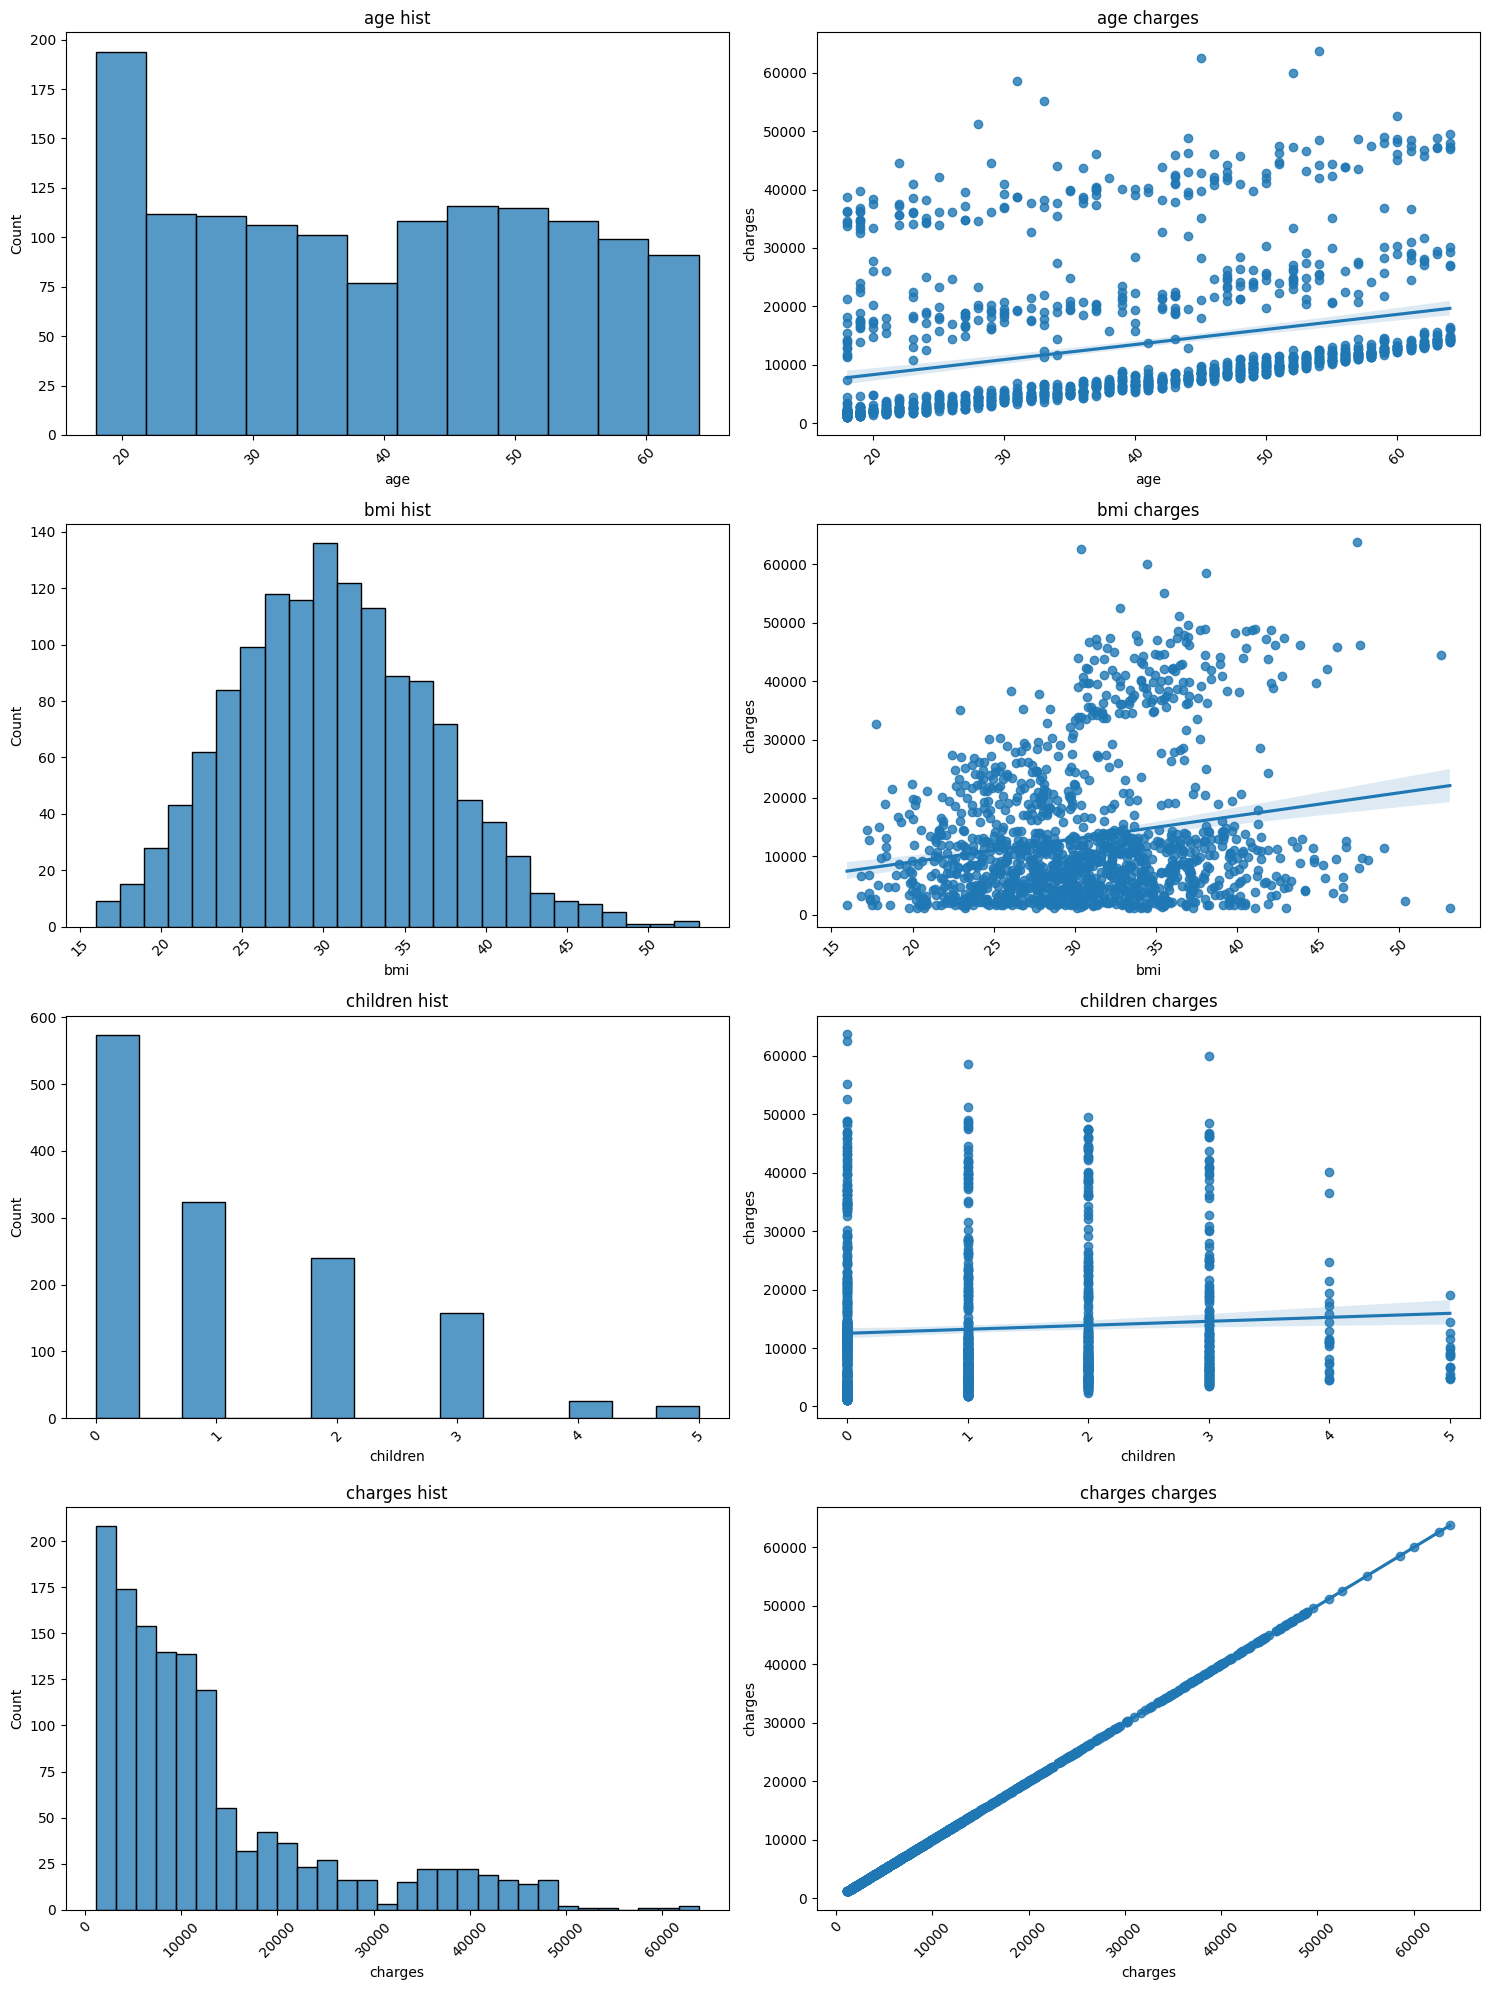

In [10]:
n = len(num_features) # Количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15,20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=data, x=feature, y='charges', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} charges'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

In [17]:
median_smoker = (data.groupby('smoker')['charges'].median().reset_index())
median_sex = (data.groupby('sex')['charges'].median().reset_index())
median_region = (data.groupby('region')['charges'].median().reset_index())

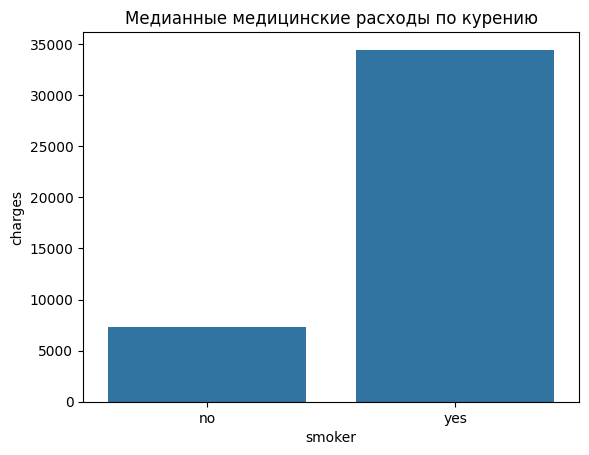

In [15]:
sns.barplot(
    data=median_smoker,
    x='smoker',
    y='charges'
)
plt.title('Медианные медицинские расходы по курению')
plt.show()

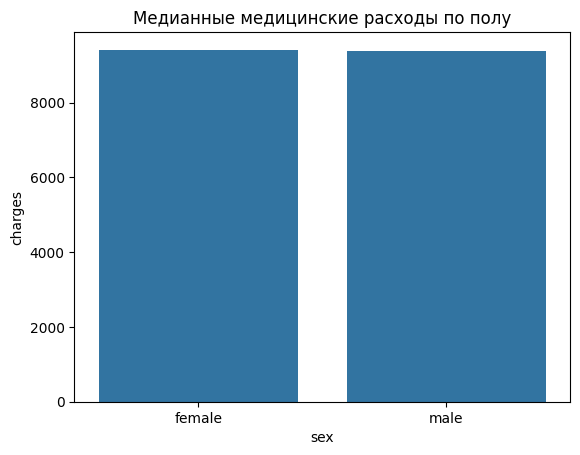

In [26]:
sns.barplot(
    data=median_sex,
    x='sex',
    y='charges'
)
plt.title('Медианные медицинские расходы по полу')
plt.show()

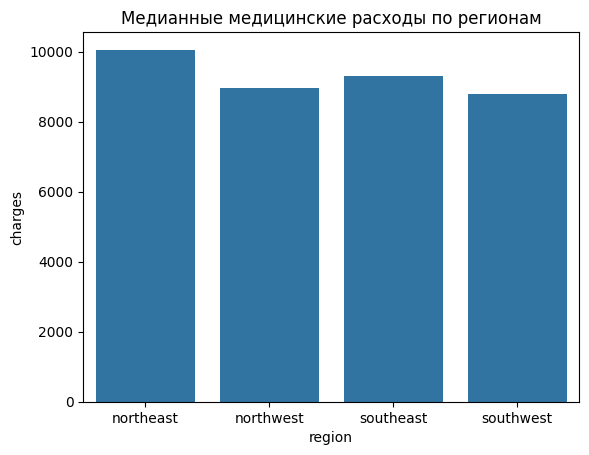

In [24]:
sns.barplot(
    data=median_region,
    x='region',
    y='charges'
)
plt.title('Медианные медицинские расходы по регионам')
plt.show()

Закодируем признаки:

 - smoker — переведём в бинарные значения (0 — некурящий, 1 — курящий);

 - sex — аналогично (0 — female, 1 — male);

 - region — используем OneHot-кодирование (воспользуемся функцией get_dummies).

In [28]:
# Кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x=='no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x=='female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [29]:
# Выделим факторы и целевой признак в отдельные таблицы:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [30]:
#Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, #таблица с наблюдениями и столбец с правильным ответами
    test_size=0.2, #размер тестовой выборки
    random_state=42 #число отвечающее за генерацию случайных чисел
)
#Выводим размеры полученных выборок
print('Train shape {}'.format(X_train.shape))
print('Test shape {}'.format(X_test.shape))

Train shape (1070, 9)
Test shape (268, 9)


In [42]:
# Инициализируем функцию для расчета метрик
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [43]:
# Создаем объект класса линейной регрессии
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.742
Train MAE: 4208
Train MAPE: 42


Test R^2: 0.784
Test MAE: 4181
Train MAPE: 47


In [ ]:
# Посмотрим чему равен свободный член обученной модели
round(lr.intercept_, 2)

np.float64(-12390.8)

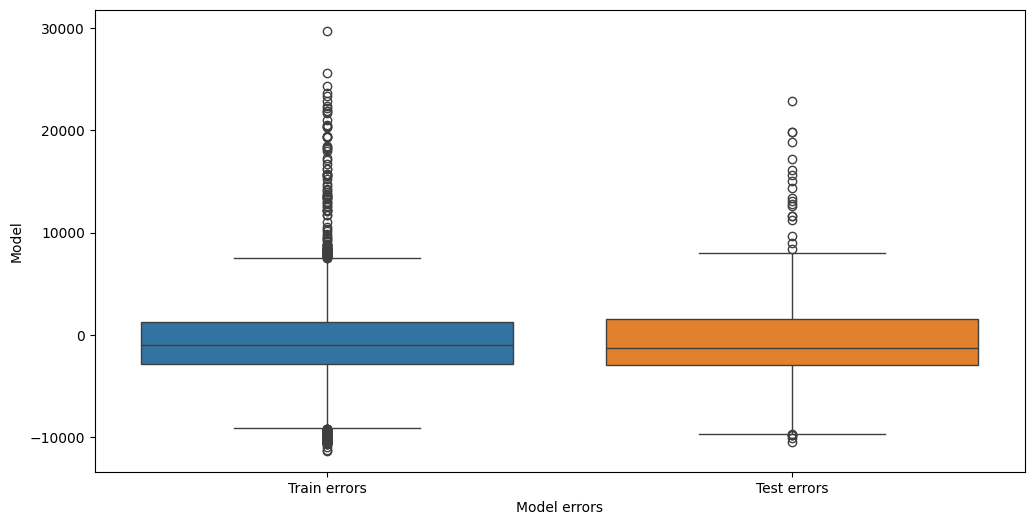

In [44]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12,6))
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - y_train_predict
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_predict
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors,
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [45]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


In [ ]:
#lr_poly = linear_model.LinearRegression()
#lr_poly.fit(X_train_scaled_poly, y_train)
#y_train_predict = np.exp(lr_poly.predict(X_train_scaled_poly))
#y_test_predict = np.exp(lr_poly.predict(X_test_scaled_poly))

#print_metrics(y_train, y_train_predict, y_test, y_test_predict)

При обучении модели вышла ошибка, т.к. коэффициенты слишком высокие и модель неустойчива

In [48]:
lr_poly.coef_

array([ 2849.35067435,  -417.24034999,  5935.92169643,  4636.08544526,
        1139.1491985 ,   351.86496094,  -366.48563336,   227.08922666,
        -212.46855424,  8399.63608632,   812.46558472,   995.68651894,
       -1666.91118191,   172.50303109,  -848.02252419,   280.84325571,
        1455.92298005,  1960.60696278,  -417.24034999,   647.47475622,
       -1238.19812114,   257.33745404,  -966.67881613,   311.8232212 ,
         544.21466602,  -306.59942109, -9711.00034091,  1559.87212018,
       54839.212545  ,  3782.01457236,  2765.86075737,  -794.72610916,
         182.77247586, -2090.61756751, -2233.48411893,  2438.06291171,
        2463.6574199 ,   410.25306251,  -675.88794885,  1139.1491985 ,
         318.56157022,  -298.80831333,  -589.98196067,  1709.37790228,
         351.86496094,     0.        ,     0.        ,     0.        ,
        -366.48563336,     0.        ,     0.        ,   227.08922666,
           0.        ,  -212.46855424])

In [55]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.842
Train MAE: 2890
Train MAPE: 29


Test R^2: 0.867
Test MAE: 2719
Train MAPE: 30


In [58]:
#Инициализируем объект класса линейная регрессия с L2-регуляризацией 
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для каждой из выборок
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.839
Train MAE: 2949
Train MAPE: 30


Test R^2: 0.863
Test MAE: 2861
Train MAPE: 31
